클라이언트 > 요청(request : url ) > 경로(DNS) > 서버 

dns : www.naver.com 123.456.66.77

서버 > db >  결과 > response(json, html, css, javascript) > 클라이언트 (어떤방식으로 보내줬지?)


In [1]:
1. 동적인페이지(url 변경 안됨)
2. 정적인페이지(url 변경,(url변경안되면서 화면이 깜빡))
requests방법 처리 가능

3. 2가지 방버으로 안된 페이지에서는 selenium(개발자동화를 목적으로 만들어진 도구)

4.방법
 - 싸이트 검색
 - 크롤링 허락문서 (robots.txt)
   - 개인허락, 기업허락
 - 싸이트의 결과 보고 어떤 방식의  response를 우리에게주는지 확인
 - 접근방식 결정
 - 속이고 매우다양한 방식으로 속이고 들어간다.


SyntaxError: invalid decimal literal (3372802662.py, line 5)

In [2]:
url = "https://m.stock.naver.com/api/index/KOSPI/basic"

In [3]:
!pip install requests

In [4]:
import requests
url ="https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=1"
res = requests.get(url)
res
#수집하고싶은 싸이트 > F12 (개발자도구)


<Response [200]>

In [5]:
res.content #바이너리 동영상, 사진
res.text #텍스트로

'[{"localTradedAt":"2024-01-29","closePrice":"2,509.36","compareToPreviousClosePrice":"30.80","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.24","openPrice":"2,490.93","highPrice":"2,511.15","lowPrice":"2,483.81"},{"localTradedAt":"2024-01-26","closePrice":"2,478.56","compareToPreviousClosePrice":"8.22","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"0.33","openPrice":"2,458.05","highPrice":"2,502.61","lowPrice":"2,453.45"},{"localTradedAt":"2024-01-25","closePrice":"2,470.34","compareToPreviousClosePrice":"0.65","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"0.03","openPrice":"2,467.73","highPrice":"2,474.01","lowPrice":"2,452.36"},{"localTradedAt":"2024-01-24","closePrice":"2,469.69","compareToPreviousClosePrice":"-8.92","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-0.36","openPrice":"2,476.22","highPrice":"2,476.22","lowP

In [6]:
type(res.content)

bytes

In [7]:
type(res.text)

str

In [8]:
datas = res.json()
datas
print(type(datas))
len(datas)

<class 'list'>


10

In [9]:
import pandas as pd
kospi_df = pd.DataFrame(datas)
kospi_df


,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2024-01-29,"2,509.36",30.80,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.24,"2,490.93","2,511.15","2,483.81"
1,2024-01-26,"2,478.56",8.22,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.33,"2,458.05","2,502.61","2,453.45"
2,2024-01-25,"2,470.34",0.65,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.03,"2,467.73","2,474.01","2,452.36"
3,2024-01-24,"2,469.69",-8.92,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.36,"2,476.22","2,476.22","2,454.34"
4,2024-01-23,"2,478.61",14.26,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.58,"2,478.32","2,482.84","2,464.24"
5,2024-01-22,"2,464.35",-8.39,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.34,"2,489.57","2,490.69","2,464.35"
6,2024-01-19,"2,472.74",32.70,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.34,"2,468.43","2,479.00","2,455.50"
7,2024-01-18,"2,440.04",4.14,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.17,"2,439.96","2,453.97","2,429.12"
8,2024-01-17,"2,435.90",-61.69,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-2.47,"2,501.23","2,503.91","2,435.34"
9,2024-01-16,"2,497.59",-28.40,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.12,"2,516.27","2,524.35","2,491.13"


In [10]:
kind = 'KOSPI'
page = 1

# a=10
# print(f"{a}"")

url =f"https://m.stock.naver.com/api/index/{kind}/price?pageSize=10&page={page}"
res = requests.get(url) #  서버에 요청 > 결과는 res 로 담기
datas = res.json() #받은객체로부터 json데이터를 리스트로 뽑아냄
kospi_df = pd.DataFrame(datas) # 리스트 > DataFrame 으로 변환 
kospi_df

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2024-01-29,"2,508.39",29.83,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.20,"2,490.93","2,511.15","2,483.81"
1,2024-01-26,"2,478.56",8.22,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.33,"2,458.05","2,502.61","2,453.45"
2,2024-01-25,"2,470.34",0.65,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.03,"2,467.73","2,474.01","2,452.36"
3,2024-01-24,"2,469.69",-8.92,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.36,"2,476.22","2,476.22","2,454.34"
4,2024-01-23,"2,478.61",14.26,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.58,"2,478.32","2,482.84","2,464.24"
5,2024-01-22,"2,464.35",-8.39,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.34,"2,489.57","2,490.69","2,464.35"
6,2024-01-19,"2,472.74",32.70,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.34,"2,468.43","2,479.00","2,455.50"
7,2024-01-18,"2,440.04",4.14,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.17,"2,439.96","2,453.97","2,429.12"
8,2024-01-17,"2,435.90",-61.69,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-2.47,"2,501.23","2,503.91","2,435.34"
9,2024-01-16,"2,497.59",-28.40,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.12,"2,516.27","2,524.35","2,491.13"


In [11]:
url ="https://m.stock.naver.com/api/index/KOSDAQ/price?pageSize=10&page=1"
res = requests.get(url) #  서버에 요청 > 결과는 res 로 담기
datas = res.json() #받은객체로부터 json데이터를 리스트로 뽑아냄
kosdaq_df = pd.DataFrame(datas) # 리스트 > DataFrame 으로 변환 
kosdaq_df

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2024-01-29,830.82,-6.42,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.77,841.21,841.21,830.09
1,2024-01-26,837.24,13.50,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.64,818.76,839.52,817.06
2,2024-01-25,823.74,-12.47,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.49,833.34,833.34,820.64
3,2024-01-24,836.21,-3.90,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.46,841.45,842.90,828.12
4,2024-01-23,840.11,0.42,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.05,840.62,848.65,833.24
5,2024-01-22,839.69,-2.98,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.35,848.87,849.32,836.89
6,2024-01-19,842.67,2.34,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.28,848.66,856.05,837.87
7,2024-01-18,840.33,7.28,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.87,834.01,848.63,830.06
8,2024-01-17,833.05,-21.78,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-2.55,856.61,856.97,832.70
9,2024-01-16,854.83,-4.88,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.57,857.39,864.90,846.47


In [12]:
kind = 'KOSDAQ'  # <<  KOSPI
page = 1
url =f"https://m.stock.naver.com/api/index/{kind}/price?pageSize=60&page={page}"
res = requests.get(url) #  서버에 요청 > 결과는 res 로 담기
datas = res.json() #받은객체로부터 json데이터를 리스트로 뽑아냄
kosdaq_df = pd.DataFrame(datas) # 리스트 > DataFrame 으로 변환 
kosdaq_df

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2024-01-29,830.75,-6.49,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.78,841.21,841.21,830.09
1,2024-01-26,837.24,13.50,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.64,818.76,839.52,817.06
2,2024-01-25,823.74,-12.47,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.49,833.34,833.34,820.64
3,2024-01-24,836.21,-3.90,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.46,841.45,842.90,828.12
4,2024-01-23,840.11,0.42,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.05,840.62,848.65,833.24
5,2024-01-22,839.69,-2.98,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.35,848.87,849.32,836.89
6,2024-01-19,842.67,2.34,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.28,848.66,856.05,837.87
7,2024-01-18,840.33,7.28,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.87,834.01,848.63,830.06
8,2024-01-17,833.05,-21.78,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-2.55,856.61,856.97,832.70
9,2024-01-16,854.83,-4.88,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.57,857.39,864.90,846.47


In [13]:
lst=[1,2,3]
lst

[1, 2, 3]

In [14]:
dt = {'a':10}
dt

{'a': 10}

In [15]:
page=10

url = f"페이지는 : {page}"

print(url)



페이지는 : 10


In [16]:
def get_stock(kind, pageSize=10, page=1 ): # 시장선택, 10~60, 1
#     kind = 'KOSDAQ'  # <<  KOSPI
#     page = 1
    url =f"https://m.stock.naver.com/api/index/{kind}/price?pageSize={pageSize}&page={page}"
    res = requests.get(url) #  서버에 요청 > 결과는 res 로 담기
    datas = res.json() #받은객체로부터 json데이터를 리스트로 뽑아냄
#     kosdaq_df = pd.DataFrame(datas) # 리스트 > DataFrame 으로 변환 
#     kosdaq_df
    return pd.DataFrame(datas)

kosdaq_df = get_stock('KOSDAQ',60)    
kosdaq_df.tail(2) #끝에서 5개

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
58,2023-11-03,782.05,9.21,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.19,779.28,782.53,768.38
59,2023-11-02,772.84,33.61,"{'code': '2', 'text': '상승', 'name': 'RISING'}",4.55,753.37,773.39,753.37


In [17]:
kospi_df = get_stock('KOSPI',60)    
kospi_df.tail(2)

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
58,2023-11-03,"2,368.34",25.22,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.08,"2,365.59","2,370.28","2,351.83"
59,2023-11-02,"2,343.12",41.56,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.81,"2,334.96","2,351.91","2,333.41"


In [18]:
def add(a,b):
    c = a+b
    print(c)
    return a+b

In [19]:
a=10
b=20
print(a+b)

30


In [20]:
def add(a,b):
    c = a+b
    print(c)
add(a,b)    

30


In [21]:
def add(a,b):
    return a+b

print(add(a,b))

30


In [22]:
# 10 1
# 10 2

for x in range(2):
    pass
    

In [23]:
kosdaq_df.tail(1)
kospi_df.tail(1)

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
59,2023-11-02,"2,343.12",41.56,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.81,"2,334.96","2,351.91","2,333.41"


In [24]:
page = 20
url=f"https://m.stock.naver.com/front-api/v1/market\
Index/prices?category=exchange&reutersCode=FX_USDKRW&page={page}"
url

'https://m.stock.naver.com/front-api/v1/marketIndex/prices?category=exchange&reutersCode=FX_USDKRW&page=20'

In [25]:
import requests as rq
res  = rq.get(url)
res.text
# type(res.text)
USDKRW = res.json()['result']  #키를 설정함으로  value가 들어간다.
len(USDKRW)
USDKRW
usd = pd.DataFrame(USDKRW)
usd.tail(1)

,localTradedAt,closePrice,fluctuations,fluctuationsRatio,fluctuationsType,cashBuyValue,cashSellValue,sendValue,receiveValue
9,2023-04-07,"1,319.00",-0.50,-0.04,"{'code': '5', 'text': '하락', 'name': 'FALLING'}","1,342.08","1,295.92","1,331.9","1,306.1"


In [26]:
del usd_df
usd_df

NameError: name 'usd_df' is not defined

In [31]:
import requests as rq
def get_exchange(reutersCode='FX_USDKRW', page=1): #FX_USDKRW
    url=f"https://m.stock.naver.com/front-api/v1/marketIndex/prices?category=exchange&reutersCode={reutersCode}&page={page}"
    res  = rq.get(url)
    USDKRW = res.json()['result']  #키를 설정함으로  value가 들어간다.
    return pd.DataFrame(USDKRW)


# usd_df = get_exchange('FX_USDKRW', 1)
# usd_df.head(1)

usd_df = pd.DataFrame() #비어있는 데이터 프레임 
for _ in range(1,7): #1,2,3,4,5,6
    temp_df = get_exchange('FX_USDKRW', f"{_}")
    usd_df = pd.concat([usd_df, temp_df], ignore_index=True)

usd_df.tail(3)
len(usd_df)

    

60

In [32]:
print(usd_df.tail(1))
print(kosdaq_df.tail(1))
print(kospi_df.tail(1))

pd.set_option('display.max_columns', None)


   localTradedAt closePrice fluctuations fluctuationsRatio  \
59    2023-11-03   1,312.00       -22.00             -1.65   

                                  fluctuationsType cashBuyValue cashSellValue  \
59  {'code': '5', 'text': '하락', 'name': 'FALLING'}     1,334.96      1,289.04   

   sendValue receiveValue  
59   1,324.8      1,299.2  
   localTradedAt closePrice compareToPreviousClosePrice  \
59    2023-11-02     772.84                       33.61   

                           compareToPreviousPrice fluctuationsRatio openPrice  \
59  {'code': '2', 'text': '상승', 'name': 'RISING'}              4.55    753.37   

   highPrice lowPrice  
59    773.39   753.37  
   localTradedAt closePrice compareToPreviousClosePrice  \
59    2023-11-02   2,343.12                       41.56   

                           compareToPreviousPrice fluctuationsRatio openPrice  \
59  {'code': '2', 'text': '상승', 'name': 'RISING'}              1.81  2,334.96   

   highPrice  lowPrice  
59  2,351.91  2,333

In [33]:
usd_df.columns
#usd_df.describe()
usd_df.columns
usd_df.localTradedAt #데이터프레임에 속한 컬럼 출력 방법1

(usd_df['localTradedAt'])#데이터프레임에 속한 컬럼 출력 방법2
(kosdaq_df.localTradedAt)


#날짜를 기준으로 병합시키겠다.
merge_df = pd.merge(kospi_df, kosdaq_df, left_on='localTradedAt', right_on='localTradedAt')
merge_df.head(1)
merge_df = merge_df.rename(columns={'localTradedAt':'day', 'closePrice_x':'KOSPI', 'closePrice_y':'KOSDAQ'})
merge_df = merge_df[['day', 'KOSPI', 'KOSDAQ']]
merge_df.head()


usd_df = usd_df.rename(columns={'localTradedAt':'day', 'closePrice':'USD'})

In [34]:
merge_df = pd.merge(merge_df,usd_df)[['day', 'KOSPI','KOSDAQ','USD']]
merge_df.head()

usd_df = usd_df.rename(columns={'localTradedAt':'day', 'closePrice':'USD'})

In [35]:
merge_df = pd.merge(merge_df, usd_df)[['day', 'KOSPI', 'KOSDAQ', 'USD']]
merge_df.tail()

,day,KOSPI,KOSDAQ,USD
54,2023-11-09,"2,427.08",802.87,"1,311.50"
55,2023-11-08,"2,421.62",811.02,"1,311.50"
56,2023-11-07,"2,443.96",824.37,"1,312.00"
57,2023-11-06,"2,502.37",839.45,"1,299.00"
58,2023-11-03,"2,368.34",782.05,"1,312.00"


In [41]:
merge_df

,day,KOSPI,KOSDAQ,USD
0,2024-01-29,2509.36,830.82,1336.8
1,2024-01-26,2478.56,837.24,1338.0
2,2024-01-25,2470.34,823.74,1336.0
3,2024-01-24,2469.69,836.21,1332.0
4,2024-01-23,2478.61,840.11,1338.5
5,2024-01-22,2464.35,839.69,1340.0
6,2024-01-19,2472.74,842.67,1337.5
7,2024-01-18,2440.04,840.33,1341.0
8,2024-01-17,2435.90,833.05,1346.5
9,2024-01-16,2497.59,854.83,1337.0


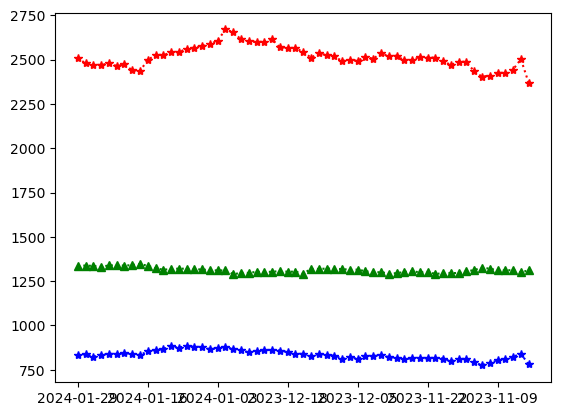

In [42]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(merge_df['day'], merge_df['KOSPI'], "r*:", label = "KOSPI")
plt.plot(merge_df['day'], merge_df['KOSDAQ'], "b*:", label = "KOSDAQ")
plt.plot(merge_df['day'], merge_df['USD'], "g^:", label = "USD")



step = len(merge_df)// 6    #len50
plt.xticks(merge_df[::step]['day'])


plt.show()


In [37]:
merge_df.dtypes
merge_df['KOSPI'] = merge_df['KOSPI'].str.replace(',', '').astype(float)

In [38]:
merge_df['KOSDAQ'] = merge_df['KOSDAQ'].str.replace(',', '').astype(float)
merge_df['USD'] = merge_df['USD'].str.replace(',', '').astype(float)

In [39]:
from sklearn import preprocessing

preprocessing.minmax_scale(merge_df[::-1]['KOSPI'])

array([0.        , 0.44458818, 0.25083756, 0.176734  , 0.19484526,
       0.13706173, 0.11749096, 0.21531164, 0.39251003, 0.39751882,
       0.33671675, 0.4075364 , 0.47129068, 0.47553654, 0.48635022,
       0.42554815, 0.42233058, 0.50890636, 0.50243805, 0.55378645,
       0.45334527, 0.48631705, 0.41775301, 0.4214018 , 0.41042226,
       0.49593658, 0.52084785, 0.5537201 , 0.47208677, 0.58327528,
       0.64756029, 0.65850665, 0.66411252, 0.81586891, 0.76850101,
       0.7668093 , 0.77702591, 0.81321525, 0.95180283, 1.        ,
       0.79268252, 0.72537898, 0.69572428, 0.66169105, 0.63986466,
       0.57597771, 0.5703055 , 0.51981955, 0.52293761, 0.42873254,
       0.2241019 , 0.23783461, 0.34630311, 0.31847282, 0.36577437,
       0.33618602, 0.33834212, 0.36560852, 0.46777457])

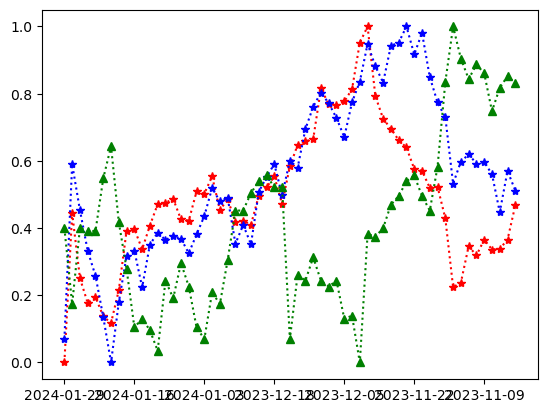

In [40]:
plt.plot(merge_df['day'], preprocessing.minmax_scale(merge_df[::-1]['KOSPI']), "r*:", label = "KOSPI")
plt.plot(merge_df['day'], preprocessing.minmax_scale(merge_df[::-1]['KOSDAQ']), "b*:", label = "KOSDAQ")
plt.plot(merge_df['day'], preprocessing.minmax_scale(merge_df[::-1]['USD']), "g^:", label = "USD")



step = len(merge_df)// 6    #len50
plt.xticks(merge_df[::step]['day'])


plt.show()

In [43]:
import numpy as np
print(np.corrcoef(merge_df['KOSPI'], merge_df['KOSDAQ'])[0,1])
print(np.corrcoef(merge_df['KOSPI'], merge_df['USD'])[0,1])
print(np.corrcoef(merge_df['KOSDAQ'], merge_df['USD'])[0,1])

0.7707087006215599
-0.40518820767863817
0.08356810852391282
